#Tutorial7_Downstream Applications

 **Aims**

This exercise aims to get you to:

•	Know about Node-level (Node Classification), Edge-level (Link Prediction) and Graph-level (Graph Classification) tasks.

•	Use embedding for the downstream tasks.

##1: Download the embedding 

In [1]:
import torch
print("Torch has version {}".format(torch.__version__))
# Install torch geometric
# Change the version of the pytorch by modifying the url at the end
# For example, the output the above cell is 'Torch has version 1.11.0+cu113'，then the url is "***torch-1.11.0+cu113.html"
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.12.0+cu113.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.12.0+cu113.html
!pip install -q torch-geometric

Torch has version 1.12.0+cu113
     |████████████████████████████████| 7.9 MB 4.3 MB/s 
     |████████████████████████████████| 3.5 MB 4.3 MB/s 
     |████████████████████████████████| 407 kB 4.3 MB/s 


In [3]:
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.datasets import Planetoid
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_max_pool
from torch_geometric.datasets import TUDataset
import numpy as np

In [4]:
# Dataset for node-level and edge-level tasks.
# (only one graph contains 3327 nodes. Nodes can be divided into 6 categories) 
Citeseer = Planetoid(root='/tmp/Citeseer', name='Citeseer')

# Dataset (600 graphs belongs 6 classes) for graph-level tasks
Enzymes = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')

Processing...
Done!
Extracting /tmp/ENZYMES/ENZYMES/ENZYMES.zip
Processing...
Done!


In [6]:
!git clone https://github.com/guaiyoui/COMP9312_Tutorial.git

Cloning into 'COMP9312_Tutorial'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 1), reused 11 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [7]:
Citeseer_Embedding = torch.from_numpy(np.loadtxt('./COMP9312_Tutorial/Citeseer.txt'))
Enzymes_Embedding = torch.from_numpy(np.loadtxt('./COMP9312_Tutorial/Enzymes.txt'))

## 2: Node Classification 

In [ ]:
# TODO
# The classification result From the Citeseer embedding.
# Hint: Each node is represented by a vector of length 6.
# The index of the largest value in the vector indicates which 
# category it belongs to. 
# (~1 line of code)

tensor([3, 1, 5,  ..., 3, 1, 5])


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = Citeseer[0].to(device)
# TODO 
# Calculate the number of nodes that is correct classified. 
# (~1 line of code)
correct = 0

acc = int(correct) / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.6610


## 3: Link Prediction


The similarity of nodes can be measured by its distance.

Larger the L1D, L2D distance, smalller the similarity. 

Larger the COS distance, larger the similarity.

\begin{equation}
L1D(x,y) = \sum_{i=1}^{k}\left|x_i-y_i\right|
\end{equation}
\begin{equation}
L2D(x,y) = \sqrt{\sum_{i=1}^{k}(x_i-y_i)^2}
\end{equation}
\begin{equation}
COS(x,y) = \frac{\sum_{i=1}^{k}x_i*y_i}{\sqrt{\sum_{i=1}^{k}x_i^2}*\sqrt{\sum_{i=1}^{k}y_i^2}}
\end{equation}
Here, k is the length of the vector

In [13]:
import math

def L1D(x, y):
  ret = 0
  # TODO
  # Calculate the L1D distance between two vector

  return ret

def L2D(x, y):
  ret = 0
  # TODO
  # Calculate the L2D distance between two vector
  return ret

def COS(x, y):
  ret = 0
  # TODO
  # Calculate the COS distance between two vector
  return ret

def edge_dist(edge, emb, sim):
  dist = 0
  # TODO
  # Given the similarity function, calculate the distance
  #  of the embedding vector of the two nodes of the edge
  return dist


An ideal embedding can distinguish which points can form an edge and which points cannot.

So we need to generate both postive edges and negative edges.

In [14]:
import random

def postive_edges(G):
  pos_edge_list = []
  for i in range(G.edge_index.shape[1]):
    pos_edge_list.append((G.edge_index[0][i], G.edge_index[1][i]))
  return pos_edge_list

def sample_postive_edges(G, num_pos_samples):
  pos_edge_list = postive_edges(G)
  # TODO
  # Sample num_pos_samples samples from pos_edge_list
  return pos_edge_list

graph = Citeseer[0]
pos_edge_list = sample_postive_edges(graph, 100)

In [ ]:
def sample_negative_edges(G, num_neg_samples):
  neg_edge_list = []
  # TODO: Implement the function that returns a list of negative edges.
  # The number of sampled negative edges is num_neg_samples.

  return neg_edge_list

neg_edge_list = sample_negative_edges(graph, 100)


There are four possible results with respect to the prediction.

(1): For a postive edge, its prediction is postive (True Positive, TP)

(2): For a postive edge, its prediction is negative (False Negative, FN)

(3): For a negative edge, its prediction is postive (False Positive, FP)

(4): For a negative edge, its prediction is negative (True Negative, TN)

True Postive Rate(TPR) = TP/P
False Positive Rate(FPR) = FP/N

The AUC (Area Under Curve) score is often used to measure the accuracy of link prediction.

The Curve is the Receiver Operating Characteristic (ROC) curve.

The x-axis of ROC is FPR, and the y-axis of ROC is TPR.

An ideal embedding is that "TPR is high when the FPR is low"

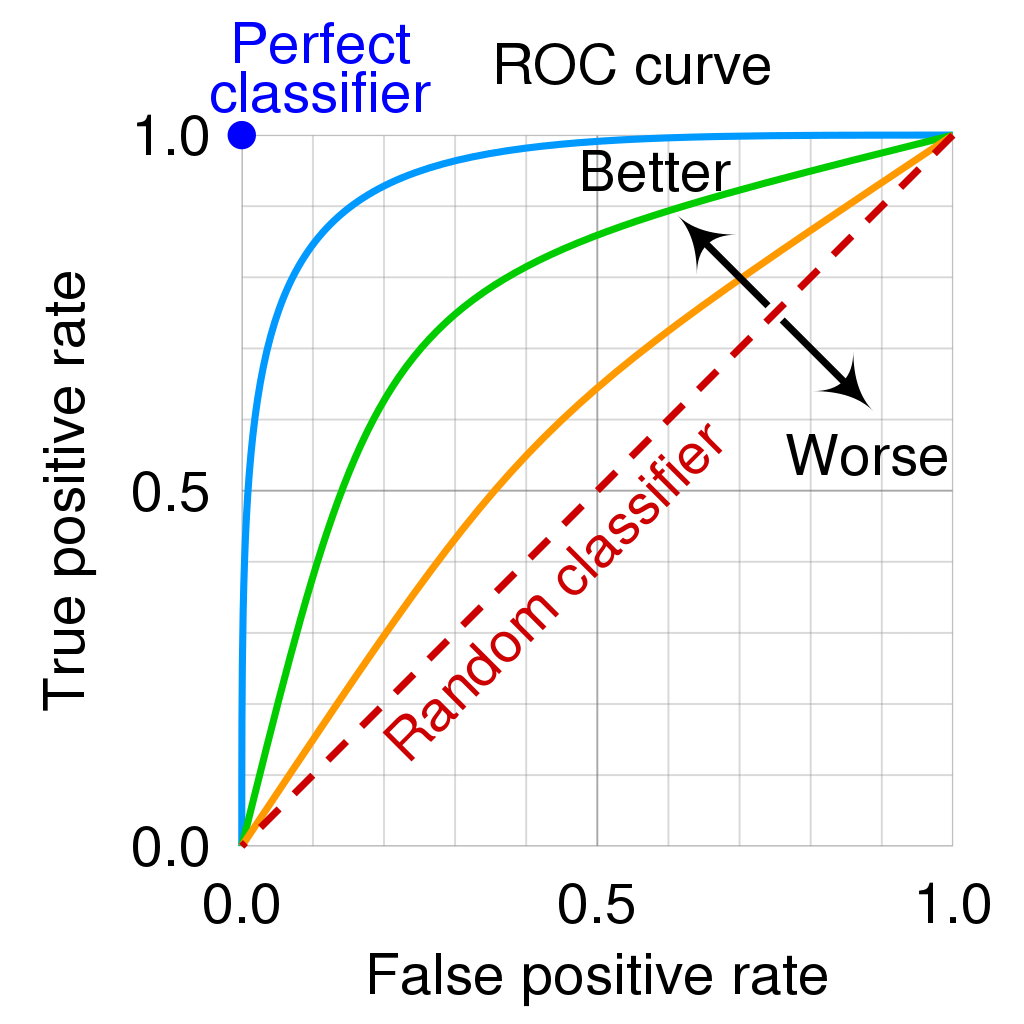


In [15]:
from sklearn import metrics
import matplotlib.pyplot as plt

def link_pred(pos_edge_list, neg_edge_list, sim):
  y = []
  pred = []
  for edge in pos_edge_list:
    d = 0
    # TODO: Calculate the similarity of nodes in the edge
    y.append(1)
    pred.append(d)
  
  for edge in neg_edge_list:
    d = 0
    # TODO: Calculate the similarity of nodes in the edge
    y.append(0)
    pred.append(d)

  AUC = 0
  # TODO: Calculate the roc_curve by metrics.roc_curve
  # TODO: Calculate the AUC score
  # TODO: Plot the roc_curve.
  return AUC

func = [L1D, L2D, COS]
for sim in func:
  auc = link_pred(pos_edge_list, neg_edge_list, sim)
  print(sim.__name__, auc)


L1D 0.833
L2D 0.8411
COS 0.9805


## 4: Graph Classification

In [ ]:
# TODO
# The classification result From the Enzymes embedding.
# Hint: Each graph is represented by a vector of length 6.
# The index of the largest value in the vector indicates which 
# category it belongs to. 
# (~1 line of code)

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = Enzymes.data.to(device)

# TODO 
# Calculate the number of nodes that is correct classified. 
# (~1 line of code)

correct = 0
acc = int(correct) / len(pred)
print(f'Accuracy: {acc:.4f}')

tensor(155)
Accuracy: 0.2583
